In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#accepting the numerator and denominator of the transfer function
num = [float(item) for item in input("Enter the numerator co-efficients : ").split()]
den = [float(item) for item in input("Enter the denominator co-efficients : ").split()]


Enter the numerator co-efficients : 1 3
Enter the denominator co-efficients : 1 7 14 8 0


In [4]:
print(num)
print(den)

[1.0, 3.0]
[1.0, 7.0, 14.0, 8.0, 0.0]


In [9]:
#trying to normalise the numerator and denominator into the same order (NOTE: I am assuming the denominator is of higher order always)
nor = len(den)-len(num)
x = np.zeros(nor)
num = np.concatenate((x, num))
tf = [num, den] #transfer function loosely put here
#affirmation for transfer function
print(tf)

In [23]:
#gain K being defined
ks = np.linspace(0, 5, num = 5000)

In [24]:
#calculating roots for every possible gain
roots = []

for k1 in ks:
    ch_eq = den +  k1*num #characteristic equation
    ch_roots = np.roots(ch_eq)
    ch_roots.sort()
    roots.append(ch_roots)
# convert final roots list into array
roots = np.vstack(roots)

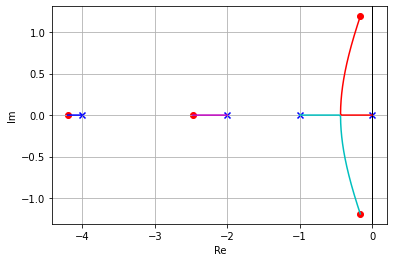

In [28]:
  # get real and imaginary values
  real_vals = np.real(roots)
  imag_vals = np.imag(roots)

  # possible colors
  colors = ['b', 'm', 'c', 'r', 'g']

  # create figure and axis labels
  fig, ax = plt.subplots()
  ax.set_xlabel('Re')
  ax.set_ylabel('Im')
  ax.axvline(x=0, color='k', lw=1)
  ax.grid(True, which='both')

  # plots a blue "x" for the first roots
  ax.scatter(real_vals[0, :], imag_vals[0, :], marker='x', color='blue')

  # plots a red "o" for the last roots
  ax.scatter(real_vals[-1, :], imag_vals[-1, :], marker='o',color='red')

  temp_real_vals = real_vals[1:-1, :]
  temp_imag_vals = imag_vals[1:-1, :]
  color_range = range(temp_real_vals.shape[1])

  # plot the rest of the roots in different colors with respect to the regions
  for r, i, j in zip(temp_real_vals.T, temp_imag_vals.T, color_range):
    ax.plot(r, i, color=colors[j])